In [6]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()

dados = pd.DataFrame(housing.data, columns=housing.feature_names)

dados['AvgPrice'] = housing.target * 100000

dados

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,AvgPrice
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,452600.0
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,358500.0
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,352100.0
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,341300.0
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,342200.0
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,78100.0
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,77100.0
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,92300.0
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,84700.0


In [7]:
X = dados.drop('AvgPrice', axis=1)
y = dados['AvgPrice']

X.shape, y.shape

((20640, 8), (20640,))

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg

LinearRegression()

In [10]:
reg.fit(X_train, y_train)

LinearRegression()

In [12]:
y_pred = reg.predict(X_test)
y_pred

array([ 71912.28416019, 176401.65706624, 270965.88334317, ...,
       446877.01657234, 118751.11855194, 200940.25097231])

In [13]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
intercept = reg.intercept_

print(r2)
print(mse)
print(mae)
print(intercept)

0.5757877060324508
5558915986.952442
53320.01304956559
-3702327.7706064163


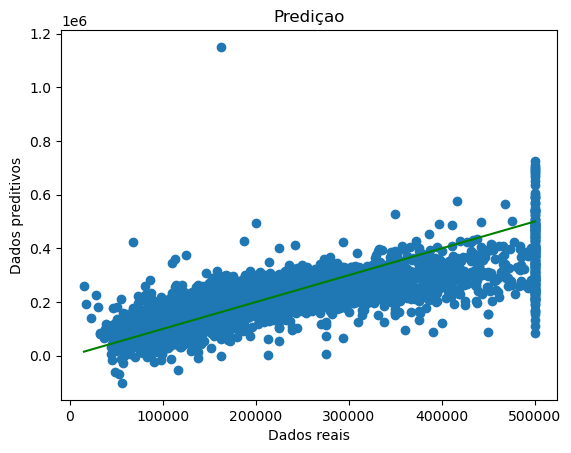

In [15]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='green')
plt.xlabel('Dados reais')
plt.ylabel('Dados preditivos')
plt.title('Prediçao')
plt.show()

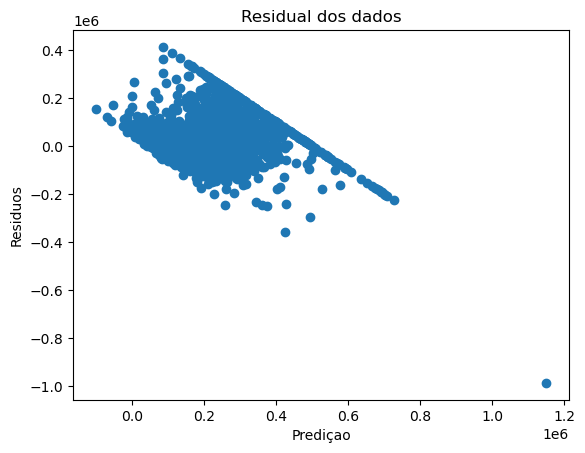

In [16]:
plt.scatter(y_pred, y_test - y_pred)
plt.xlabel('Prediçao')
plt.ylabel('Residuos')
plt.title('Residual dos dados')
plt.show()